In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


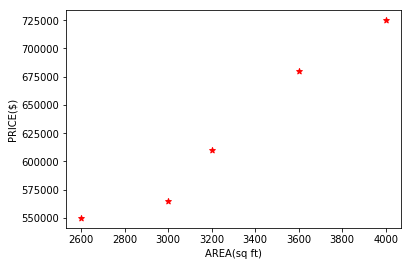

In [3]:
%matplotlib inline
plt.xlabel("AREA(sq ft)")
plt.ylabel("PRICE($)")
plt.scatter(df.area,df.price,color='red',marker='*')
plt.show()

In [4]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)
#for a given area we need to predict the price in dollars

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
reg.predict([[3300]])

array([628715.75342466])

In [6]:
reg.coef_
#m

array([135.78767123])

In [7]:
reg.intercept_
#c

180616.43835616432

In [8]:
reg.coef_*3300+reg.intercept_
#y=mx+c

array([628715.75342466])

In [9]:
d=pd.read_csv("area1.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,2801
5,4000
6,4500
7,4750
8,2300
9,9000


In [10]:
p=reg.predict(d)

In [11]:
d['price']=p
d

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,2801,5.609577e+05
5,4000,7.237671e+05
6,4500,7.916610e+05
7,4750,8.256079e+05
8,2300,4.929281e+05
9,9000,1.402705e+06


In [12]:
d.to_csv("Prediction1.csv")

In [13]:
l=pd.read_csv("prediction.csv")

In [14]:
l

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,2801,5.609577e+05
5,4000,7.237671e+05
6,4500,7.916610e+05
7,4750,8.256079e+05
8,2300,4.929281e+05
9,9000,1.402705e+06


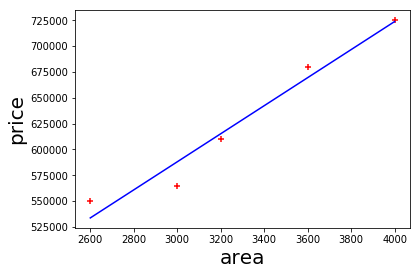

In [15]:
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

# Linear Regression Multiple variable

In [16]:
#price=m1*area+m2*bedrooms+m3*age+b
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
import math
median_bedrooms=math.floor(df.bedrooms.median())
median_bedrooms

4

In [19]:
df.bedrooms.fillna(median_bedrooms)

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [20]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [21]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
reg.coef_
#m1 m2 m3

array([  112.06244194, 23388.88007794, -3231.71790863])

In [23]:
reg.intercept_

221323.00186540408

In [24]:
reg.predict([[3000,4,15]])

array([602590.07937407])

In [25]:
reg.predict([[2500,4,5]])

array([578876.03748933])

In [26]:
dff=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [27]:
dff.experience=dff.experience.fillna("zero")

In [28]:
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
from word2number import w2n
dff.experience=dff.experience.apply(w2n.word_to_num)
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [30]:
import math
median_test_score = math.floor(dff['test_score(out of 10)'].mean())
median_test_score

7

In [31]:
dff['test_score(out of 10)'] = dff['test_score(out of 10)'].fillna(median_test_score)
dff

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [32]:
reg = linear_model.LinearRegression()
reg.fit(dff[['experience','test_score(out of 10)','interview_score(out of 10)']],dff['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [34]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [35]:
import pickle

In [36]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f);

NameError: name 'model' is not defined